**Backpropagation Algorithm**

Backpropagation (Backward Propagation of Errors) is a supervised learning algorithm used to train artificial neural networks (ANNs). It optimizes the weights of a neural network using gradient descent to minimize the error.

**Steps in Backpropagation:**

*Forward Propagation:* Compute the output using the current weights.
Compute Loss: Compare predicted output with the actual output.

*Backward Propagation:* Compute gradients of the loss with respect to weights using the chain rule of differentiation.

*Update Weights:* Adjust weights using gradient descent to minimize the error.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


28
28


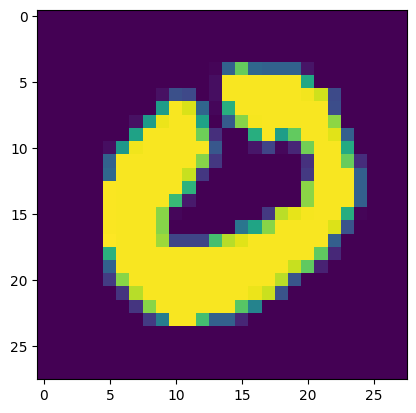

In [3]:
plt.imshow(X_test[25])
#obtain input image row and column lenghts
input_img_row=X_train[0].shape[0]
input_img_col=X_train[0].shape[1]
print(input_img_row)
print(input_img_col)

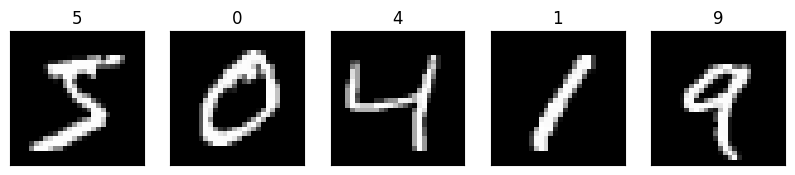

In [4]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=True,
 sharey=False, figsize=(10, 4))
for i in range(5):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
 temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

In [6]:
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
 temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [7]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the Neural Network model
train = model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
from google.colab import drive
drive.mount('/content/drive')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - acc: 0.8429 - loss: 0.5658 - val_acc: 0.9046 - val_loss: 0.3100
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.9105 - loss: 0.2903 - val_acc: 0.9193 - val_loss: 0.2573
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.9218 - loss: 0.2506 - val_acc: 0.9337 - val_loss: 0.2159
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - acc: 0.9260 - loss: 0.2367 - val_acc: 0.9339 - val_loss: 0.2266
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.9357 - loss: 0.2047 - val_acc: 0.9387 - val_loss: 0.1969
Mounted at /content/drive


In [9]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 2 1 ... 4 5 6]


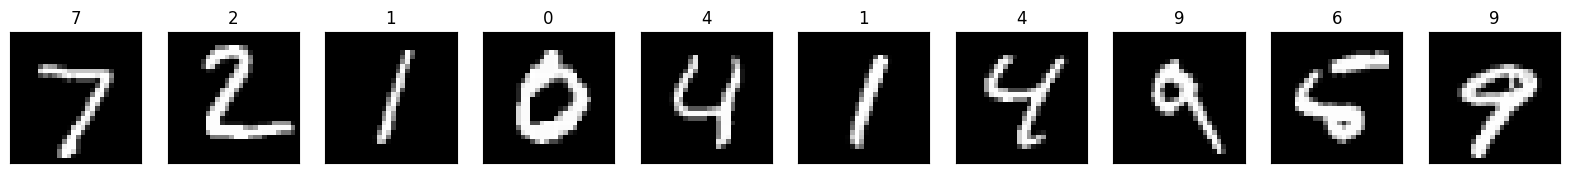

In [10]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
 sharey=True, figsize=(20, 4))
for i in range(10):
  axes[i].set_title(predictions[i])
  axes[i].imshow(X_test[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

Test loss: 0.19692084193229675
Test accuracy: 0.9387000203132629


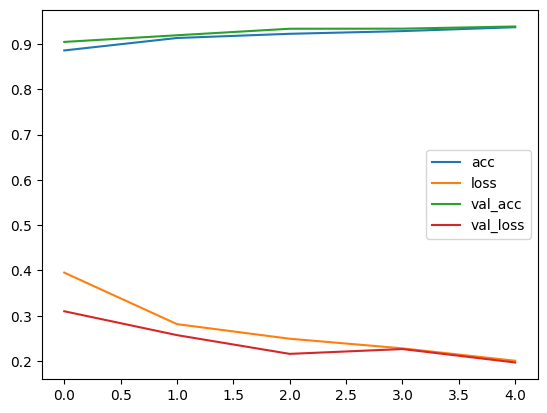

In [11]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
# %matplotlib inline
pd.DataFrame(train.history).plot()
plt.show()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


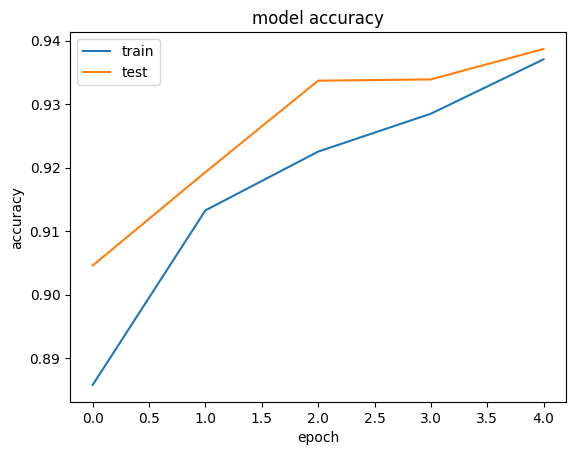

In [12]:
# list all data in history
print(train.history.keys())
# summarize history for accuracy
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

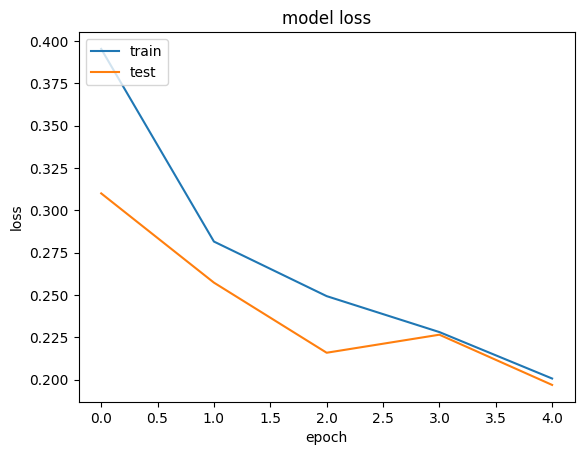

In [13]:
# summarize history for loss
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()